# IPA transcriptions grammar

This notebook demonstrates a basic [Lark](https://lark-parser.readthedocs.io/en/latest/) grammar for validating transcriptions using symbols from the [International Phonetic Alphabet (IPA)](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet).

If you want to graphically visualize parse trees from IPA transcriptions, you'll need to install `graphiz`: https://graphviz.org/

In [1]:
from lark import Lark

def load_grammar(filename='ipa.lark'):
    """Return a lark parser from the given .lark grammar"""
    with open(filename, mode='r') as f:
        return Lark(f.read(), start='transcription')

def pretty_parse(sentence, parser):
    """Parse a given 'sentence' with the given parser and pretty-print the parse tree"""
    try:
        print(parser.parse(sentence).pretty())
    except Exception as e:
        print(e)


In [2]:
parser = load_grammar()

In [3]:
pretty_parse('/ˈɡɹæ.məɹ/', parser)

transcription
  phonemic
    stress
    phonemes
      phoneme
        c
        None
      phoneme
        c
        None
      phoneme
        v
        None
        None
    stress
    phonemes
      phoneme
        c
        None
      phoneme
        v
        None
        None
      phoneme
        c
        None



In [4]:
pretty_parse('/ˈɡɹæ.mə(ɹ)/', parser)

No terminal matches '(' in the current parser context, at line 1 col 9

/ˈɡɹæ.mə(ɹ)/
        ^
Expected one of: 
	* ⱱ
	* ɘ
	* Æ
	* ʡ
	* Ɲ
	* Β
	* ʛ
	* ‿
	* ɳ
	* Ħ
	* L
	* ʙ
	* Ŋ
	* Ɨ
	* Ɥ
	* __ANON_16
	* ɮ
	* Ʊ
	* V
	* ɸ
	* T
	* Ø
	* Ɯ
	* Ʝ
	* Ʈ
	* Ɪ
	* Ɛ
	* ɹ
	* __ANON_15
	* Χ
	* Ɐ
	* X
	* Ɔ
	* Ɗ
	* A
	* M
	* ʐ
	* ʑ
	* ˌ
	* Ɡ
	* ʢ
	* ː
	* Ʒ
	* ǂ
	* ʜ
	* Ɱ
	* ʏ
	* ˑ
	* ʼ
	* __ANON_2
	* SLASH
	* Ɑ
	* Ɬ
	* Ɵ
	* Ɽ
	* __ANON_11
	* ɧ
	* ʕ
	* Ç
	* Q
	* Ɜ
	* ɢ
	* ɭ
	* K
	* __ANON_20
	* ʘ
	* ǁ
	* E
	* ɻ
	* ɶ
	* ɰ
	* B
	* Ʌ
	* ˈ
	* Ɦ
	* Z
	* P
	* __ANON_14
	* W
	* ʍ
	* Ʀ
	* H
	* Ə
	* Y
	* Ʃ
	* __ANON_13
	* Ɠ
	* Ð
	* ɞ
	* __ANON_17
	* ɴ
	* ʄ
	* ɟ
	* __ANON_22
	* Ɒ
	* ʟ
	* ʁ
	* Ʉ
	* N
	* __ANON_24
	* Ɖ
	* Ʂ
	* ɕ
	* D
	* ǀ
	* U
	* F
	* __ANON_21
	* ʔ
	* Ɓ
	* R
	* ɾ
	* O
	* Θ
	* ʎ
	* Ɣ
	* __ANON_12
	* Œ
	* S
	* ˀ
	* C
	* BANG
	* DOT
	* ɤ
	* __ANON_23
	* __ANON_19
	* Ʋ
	* I
	* __ANON_18
	* ɺ
	* J



In [5]:
from lark import tree
tree.pydot__tree_to_dot(parser.parse('/ˈɡɹæ.məɹ/'), 'parse.gv')

In [6]:
!dot -Tpng -o parse.png parse.gv

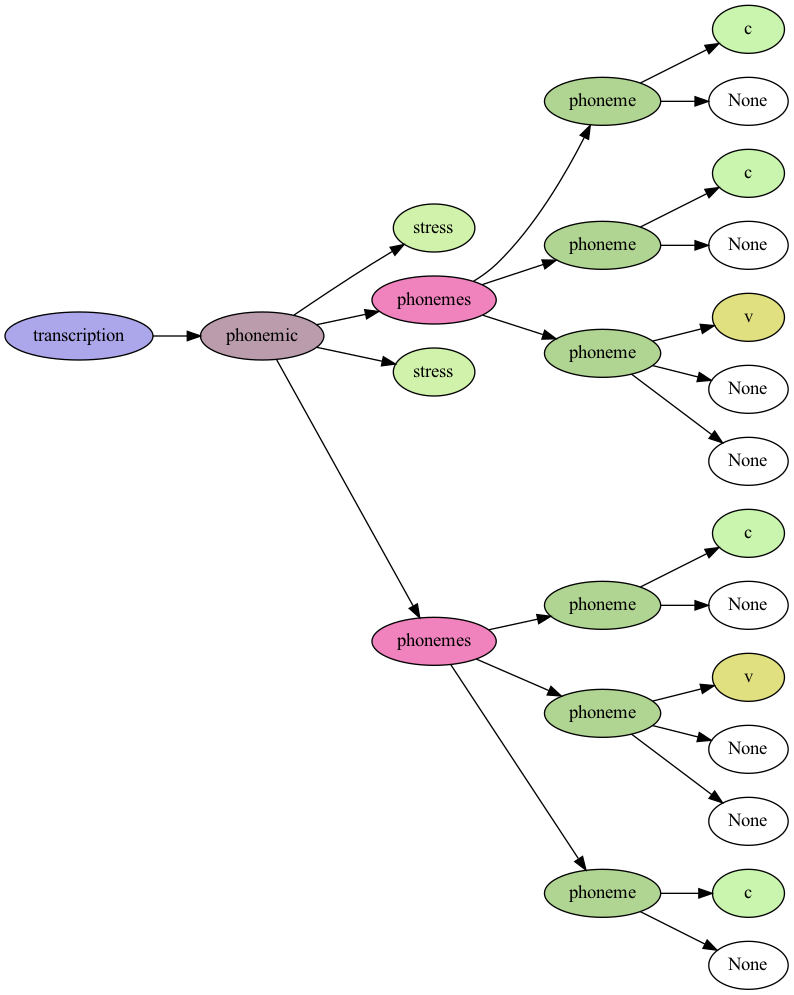

In [7]:
from IPython.display import Image
Image(filename='parse.png') 

In [8]:
pretty_parse('[kʰæt]', parser)

transcription
  phonetic
    None
    phonemes
      phoneme
        c
        cfeatures
          cfeature
      phoneme
        v
        None
        None
      phoneme
        c
        None



In [9]:
tree.pydot__tree_to_dot(parser.parse('[kʰæt]'), 'cat.gv')

In [10]:
!dot -Tpng -o cat.png cat.gv

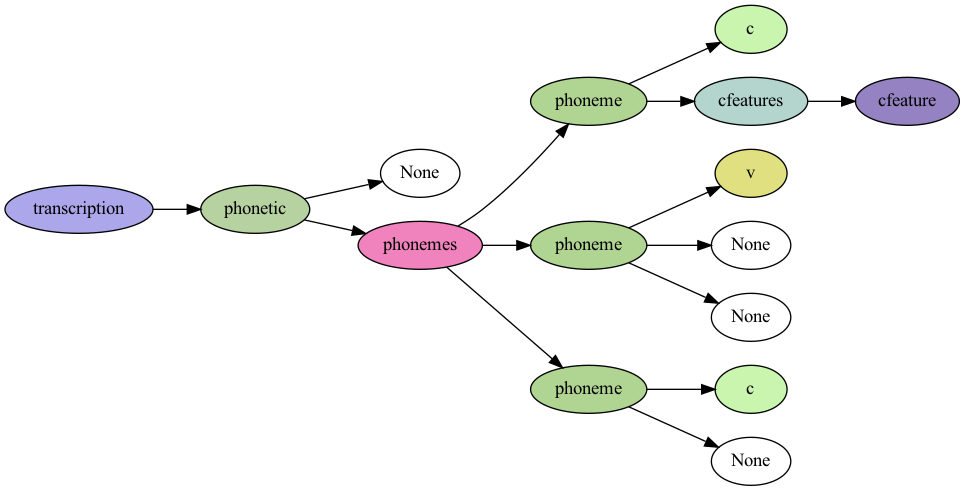

In [11]:
Image(filename='cat.png')